In [1]:
import skimage
import skimage.io as io
import matplotlib.pyplot as plt

import numpy as np
import cv2
import math
%matplotlib inline

# 1

In [2]:
def gray2ycrcb(image):
    img1 = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2YCR_CB)
    return img2

In [3]:
def ycrcb2gray(image):
    img1 = cv2.cvtColor(image, cv2.COLOR_YCR_CB2BGR)
    img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    return img2

In [4]:
def print_img(image):
    print(image.shape)
    plt.figure(figsize=(6, 6))
    io.imshow(image)
    plt.show()

In [5]:
def linear_transform(image):
    minv = image[0][0]
    maxv = image[0][0]
    for i in xrange(image.shape[0]):
        for j in xrange(image.shape[1]):
            minv = min(minv, image[i][j])
            maxv = max(maxv, image[i][j])
    zero_image =  image - minv
    maxv -= minv
    zero_image = (255.0 / maxv) * zero_image
    return (zero_image).astype('uint8')

In [42]:
def rgb2gray(rgb):
    # print (list(rgb))
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    # gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return 50 * r.copy()
    return (gray)

[array([ 22,  22,  22, ..., 120,  70, 170], dtype=uint8), array([172, 172, 172, ..., 120,  70, 170], dtype=uint8), array([128, 128, 128, ...,  64, 220,  14], dtype=uint8), array([ 22,  22,  22, ..., 108,   8,   8], dtype=uint8), array([ 22,  22,  22, ..., 152,   2, 208], dtype=uint8), array([128, 128, 128, ..., 146,  46, 202], dtype=uint8), array([172, 172, 172, ..., 140,  90,  40], dtype=uint8), array([22, 22, 22, ..., 84, 84, 34], dtype=uint8), array([ 22,  22,  22, ...,  28, 128,  28], dtype=uint8), array([ 22,  22,  22, ..., 134, 178, 178], dtype=uint8), array([ 22,  22,  22, ...,  40, 234, 178], dtype=uint8), array([ 22,  22,  22, ..., 102, 140, 134], dtype=uint8), array([ 22,  22,  22, ..., 214, 252, 246], dtype=uint8), array([ 22,  22,  22, ..., 170, 158, 152], dtype=uint8), array([ 22,  22,  22, ..., 176,  14,   8], dtype=uint8), array([ 22,  22,  22, ..., 232,  20, 170], dtype=uint8), array([228, 228, 228, ...,  82, 232,  26], dtype=uint8), array([228, 228, 228, ...,  32, 182,

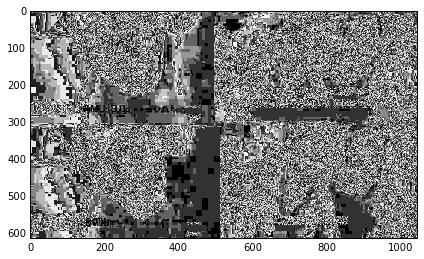

(612, 1046, 3)


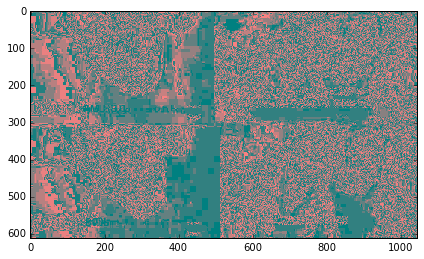

In [43]:
image = rgb2gray(io.imread('black.jpg')) #.astype('float64')/256.0
print (list(image))
print_img(image)
image = gray2ycrcb(image)
print_img(image)

# 2

In [26]:
def simple_delight(image, radii=50):
    img_copy = image.copy()
    bright_img = img_copy[:,:,0]
    ysh = cv2.GaussianBlur(bright_img, (2*radii+1, 2*radii+1), 0)
    div = np.log(bright_img.astype('float64') / ysh.astype('float64'))
    div = linear_transform(div)
    img_copy[:,:,0] = div
    print_img(ycrcb2gray(img_copy))

# 3, 4 

/home/aliakseisemchankau/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/home/aliakseisemchankau/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in subtract
/home/aliakseisemchankau/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in multiply


(612, 1046)


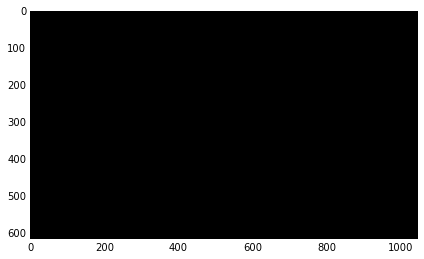

In [27]:
simple_delight(image,radii=90)

In [28]:
def hard_delight(image, radii=50):
    img_copy = image.copy()
    bright_img = img_copy[:,:,0]
    ysh = cv2.GaussianBlur(bright_img, (2*radii+1, 2*radii+1), 0)
    div = bright_img.astype('float64') / ysh.astype('float64')
    div = linear_transform(div)
    img_copy[:,:,0] =  div
    print_img(ycrcb2gray(img_copy))

# 5, 6

(612, 1046)


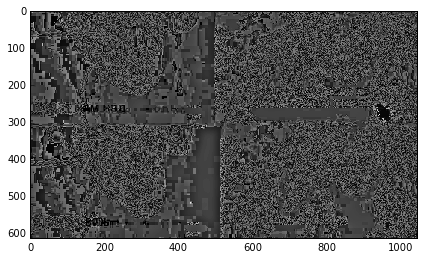

In [29]:
hard_delight(image, radii=40)

 $\log{Y/Y'}$ выглядит лучше, чем $Y/Y'$. Логарифм сильно "сглаживает" числа, которые лежат около $1$, т.е. монотонный фон изображения таковым и останется, а вот буквы будут выделены ярко, т.к. около $0$ числа не сглаживаются, а наоборот, раскидываются на большое расстояние.